In [1]:
import json
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import time
from citipy import citipy
from config import api_key

In [2]:
#import a list of cities from download.geonames.org/export/dump
Countries_df = pd.read_csv("worldcities.csv")
Countries_df

#picking 500 random cities
Cities = random.choices(Countries_df["city_ascii"], k=1000)

        
    
#for i in range(len(Latitude)):
    #Lat = Latitude[i]
    #Lng = Longitude[i]
    #city = citipy.nearest_city(Lat,Lng)
    #Cities.append(city.city_name) 
print(Cities)

['Outapi', 'Tajarhi', 'Middlesex', 'Orocue', 'Primero de Enero', 'Gevelsberg', 'Horsham', 'Faisalabad', 'Morozovsk', 'Kutna Hora', 'Marilla', 'Verona', 'Ciudad Benito Juarez', 'Puerto San Carlos', 'Sutton Coldfield', 'Leon', 'Oldham', 'Vanersborg', 'Ertis', 'Wenling', 'Phan Thiet', 'Kelme', 'Pluzine', 'Sinuiju', 'Ganzhou', 'Boulder Hill', 'Kempston', 'Cowansville', 'Linxia Chengguanzhen', 'Northwood', 'Zhaodong', 'Hythe', 'Al Burayqah', 'Stadtlohn', 'Salida', 'Chita', 'Upper Arlington', 'Columbus', 'Glen Innes', 'Doral', 'Lake Oswego', 'Zhangjiajie', 'Targu-Mures', 'Northwood', 'Fate', 'Bois-des-Filion', 'Qiryat Shemona', 'Pine Township', 'Lakeland Village', 'Rouyn-Noranda', 'Masyaf', 'Calbuco', 'Iganga', 'Trussville', 'Sudzha', 'Bradenton', 'Backnang', 'Miragoane', 'Mkazi', 'Noya', 'Stornoway', 'Village of Oak Creek', 'Changzhou', 'Jedlicze', 'Kiama', "Ch'onan", 'Dabola', 'Carver', 'Consett', 'Rauenberg', 'San Miguel de Allende', 'Baltiysk', 'Kasukabe', 'Velike Lasce', 'Seasalter', 'S

In [3]:
City_df = pd.DataFrame()
cnt = 0
lng = []
lat = []
temp = []
humidity =[]
wind = []
cloud = []
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL and iterrate over Cities array
for j in range(len(Cities)):
    city2 = Cities[j]
    query_url = url + "appid=" + api_key + "&q=" + city2 + "&units=" + units
    
    if cnt == 500:
        break
    
    try:
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        lng.append(weather_json["coord"]["lon"])
        lat.append(weather_json["coord"]["lat"])
        temp.append(weather_json["main"]["temp"])
        humidity.append(weather_json["main"]["humidity"])
        wind.append(weather_json["wind"]["speed"])

        if weather_json["weather"][0]["id"] == 800:
             cloud.append(0)
        elif weather_json["weather"][0]["id"] == 801:
            cloud.append(25)
        elif weather_json["weather"][0]["id"] == 802:
            cloud.append(50)
        elif weather_json["weather"][0]["id"] == 803:
            cloud.append(75)
        else:
            cloud.append(100)
        
        #print(str(cnt)) used this print statement to see where it was at in the count process
    except:
        cnt = cnt -1
        continue
        
        
    cnt = cnt + 1

City_df["Lng"] = lng    
City_df["Lat"] = lat
City_df["Temp"] = temp
City_df["Humidity"] = humidity
City_df["Wind_Spd_mph"] = wind
City_df["Cloud_Perc"] = cloud
City_df      

-2
-1
0
1
2
3
4
5
6
7
8
8
9
10
11
12
13
14
15
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
48
49
50
51
52
52
53
54
55
56
57
58
59
60
61
61
62
63
64
65
66
67
68
69
70
71
72
73
74
74
75
76
77
77
78
79
80
81
82
83
83
83
84
85
86
87
88
89
90
90
91
92
93
94
95
96
97
98
99
100
101
101
102
103
104
105
106
107
108
109
110
111
112
112
113
114
115
116
117
118
119
119
120
121
122
123
124
125
126
127
127
128
129
130
131
132
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
168
169
170
171
172
173
173
174
175
176
177
178
179
180
181
182
182
183
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
196
197
198
199
200
201
202
202
203
204
205
206
207
208
209
210
211
212
213
214
215
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
241
242
242
243
244
245
246
246
247
248
249
250
250


,Lng,Lat,Temp,Humidity,Wind_Spd_mph,Cloud_Perc
0,-71.3328,42.4998,44.10,39,3.44,0
1,-71.3354,4.7912,84.09,61,2.95,100
2,-78.4283,21.9469,80.60,78,8.05,25
3,7.3333,51.3167,40.01,56,4.88,100
4,-0.3272,51.0640,33.40,87,2.30,0
...,...,...,...,...,...,...
548,-2.7576,54.6658,42.01,84,4.07,100
549,-72.4262,41.0648,49.06,43,5.75,0
550,121.6550,31.8111,64.81,94,8.41,100
551,15.4222,45.8461,41.41,93,2.30,100


In [ ]:
# Save as a csv
City_df.to_csv("Cities_df.csv", encoding="utf-8", index=False)

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city2 = "London"
query_url = url + "appid=" + api_key + "&q=" + city2 + "&units=" + units
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json["weather"]

[{'id': 804,
  'main': 'Clouds',
  'description': 'overcast clouds',
  'icon': '04n'}]

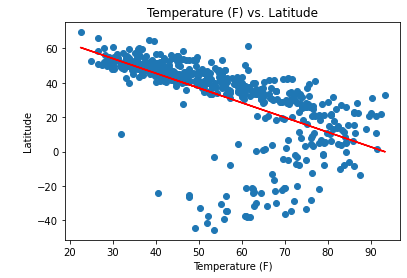

In [4]:
#Temperature (F) vs. Latitude Graph

plt.scatter(City_df["Temp"],City_df["Lat"])
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.title("Temperature (F) vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(City_df["Temp"],City_df["Lat"])
regress_values = City_df["Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(City_df["Temp"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

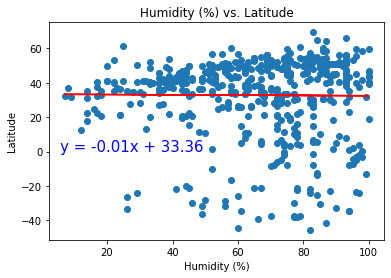

In [5]:
#Humidity (%) vs. Latitude Graph

plt.scatter(City_df["Humidity"],City_df["Lat"])
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Humidity (%) vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(City_df["Humidity"],City_df["Lat"])
regress_values = City_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(City_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

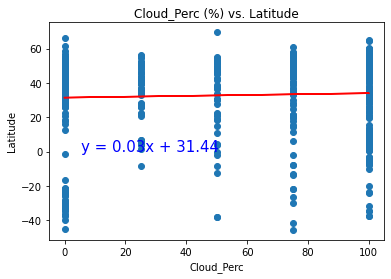

In [6]:
#Cloudiness (%) vs. Latitude Graph

plt.scatter(City_df["Cloud_Perc"],City_df["Lat"])
plt.xlabel("Cloud_Perc")
plt.ylabel("Latitude")
plt.title("Cloud_Perc (%) vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(City_df["Cloud_Perc"],City_df["Lat"])
regress_values = City_df["Cloud_Perc"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(City_df["Cloud_Perc"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

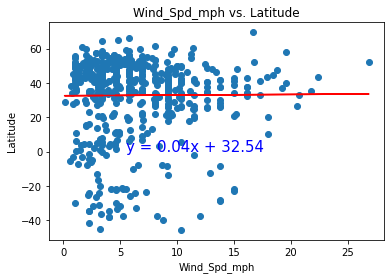

In [10]:
#Wind Speed (mph) vs. Latitude Graph

plt.scatter(City_df["Wind_Spd_mph"],City_df["Lat"])
plt.xlabel("Wind_Spd_mph")
plt.ylabel("Latitude")
plt.title("Wind_Spd_mph vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(City_df["Wind_Spd_mph"],City_df["Lat"])
regress_values = City_df["Wind_Spd_mph"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(City_df["Wind_Spd_mph"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

In [11]:
#Northern Hemisphere DataFrame

N_Hem_df = City_df.loc[(City_df["Lat"] > 0)]

#Southern Hemisphere DataFrame

S_Hem_df = City_df.loc[(City_df["Lat"] < 0)]

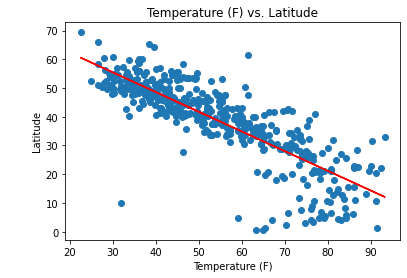

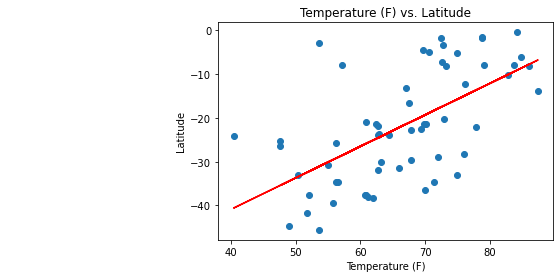

In [12]:
#North Hemisphere Temperature (F) vs. Latitude Graph

plt.scatter(N_Hem_df["Temp"],N_Hem_df["Lat"])
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Temperature (F) vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(N_Hem_df["Temp"],N_Hem_df["Lat"])
regress_values = N_Hem_df["Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(N_Hem_df["Temp"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

#South Hemisphere Temperature (F) vs. Latitude Graph

plt.scatter(S_Hem_df["Temp"],S_Hem_df["Lat"])
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Temperature (F) vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(S_Hem_df["Temp"],S_Hem_df["Lat"])
regress_values = S_Hem_df["Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(S_Hem_df["Temp"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

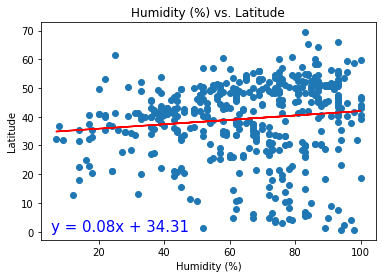

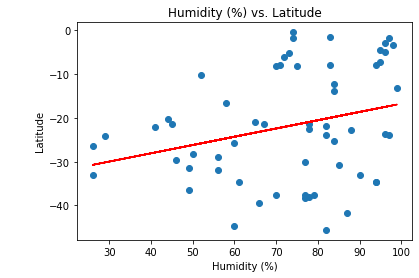

In [13]:
#North Hemisphere Humidity (%) vs. Latitude Graph

plt.scatter(N_Hem_df["Humidity"],N_Hem_df["Lat"])
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Humidity (%) vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(N_Hem_df["Humidity"],N_Hem_df["Lat"])
regress_values = N_Hem_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(N_Hem_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

#South Hemisphere Humidity (%) vs. Latitude Graph

plt.scatter(S_Hem_df["Humidity"],S_Hem_df["Lat"])
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Humidity (%) vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(S_Hem_df["Humidity"],S_Hem_df["Lat"])
regress_values = S_Hem_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(S_Hem_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

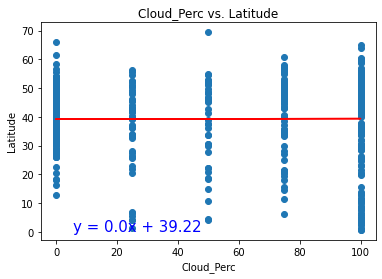

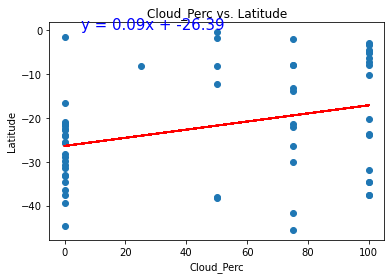

In [14]:
#North Hemisphere Cloudiness (%) vs. Latitude Graph

plt.scatter(N_Hem_df["Cloud_Perc"],N_Hem_df["Lat"])
plt.xlabel("Cloud_Perc")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Cloud_Perc vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(N_Hem_df["Cloud_Perc"],N_Hem_df["Lat"])
regress_values = N_Hem_df["Cloud_Perc"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(N_Hem_df["Cloud_Perc"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

#South Hemisphere Cloudiness (%) vs. Latitude Graph

plt.scatter(S_Hem_df["Cloud_Perc"],S_Hem_df["Lat"])
plt.xlabel("Cloud_Perc")
plt.ylabel("Latitude")
plt.title("southern Hemisphere Cloud_Perc vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(S_Hem_df["Cloud_Perc"],S_Hem_df["Lat"])
regress_values = S_Hem_df["Cloud_Perc"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(S_Hem_df["Cloud_Perc"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

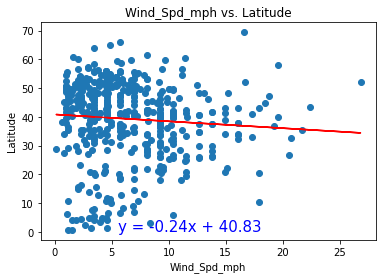

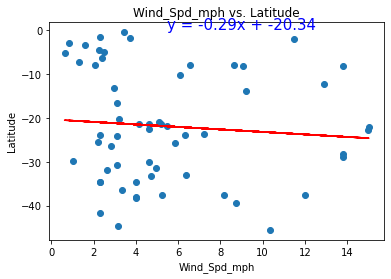

In [15]:
#North Hemisphere Wind Speed (mph) vs. Latitude Graph

plt.scatter(N_Hem_df["Wind_Spd_mph"],N_Hem_df["Lat"])
plt.xlabel("Wind_Spd_mph")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Wind_Spd_mph vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(N_Hem_df["Wind_Spd_mph"],N_Hem_df["Lat"])
regress_values = N_Hem_df["Wind_Spd_mph"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(N_Hem_df["Wind_Spd_mph"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()

#South Hemisphere Wind Speed (mph) vs. Latitude Graph

plt.scatter(S_Hem_df["Wind_Spd_mph"],S_Hem_df["Lat"])
plt.xlabel("Wind_Spd_mph")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Wind_Spd_mph vs. Latitude")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(S_Hem_df["Wind_Spd_mph"],S_Hem_df["Lat"])
regress_values = S_Hem_df["Wind_Spd_mph"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(S_Hem_df["Wind_Spd_mph"],regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
plt.show()